In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
dfprod= pd.read_csv(r"C:\Users\Federico\Documents\Progetti Jupyter\FIle grezzi\doe-biofuel-consumption-production\Produzione.csv")
pd.set_option('display.max_rows', dfprod.shape[0]+1)

In [3]:
#Let's take a first look at the data
dfprod.head(20)

,Unnamed: 0,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
0,North America,109.24,119.60946,144.29389,187.86691,227.29032,265.21215,340.15054,472.83005,666.47907,768.71809,914.4242
1,Bermuda,0,0,0,0,0,0,0,0,0,0,0
2,Canada,3.7,3.9,4,4,4,4.6,5.2,15.4,16.7,22.1,26.4
3,Greenland,0,0,0,0,0,0,0,0,0,0,0
4,Mexico,0,0,0,0,0,0,0,0.1,0.1,0.103,0.4
5,Saint Pierre and Miquelon,0,0,0,0,0,0,0,0,0,0,0
6,United States,105.54,115.70946,140.29389,183.86691,223.29032,260.61215,334.95054,457.33005,649.67907,746.51509,887.6242
7,Central & South America,185.1267,198.80565,221.35167,254.77137,256.97708,285.22176,330.53949,425.88543,533.67376,533.48639,588.25312
8,Antarctica,0,0,0,0,0,0,0,0,0,0,0
9,Antigua and Barbuda,0,0,0,0,0,0,0,0,0,0,0


In [4]:
#From this we can see there a lot of countries with no production at all, these would just end up cluttering the final graphs
#we want to obtain, so it is better to delete them.

In [5]:
#Our first step in the process of cleaning the data is to properly rename the first column:
dfprod=dfprod.rename(columns={"Unnamed: 0" : "Country"})

In [6]:
#We now set said column as the index so that we can work only on the columns specified by every year in the past decade.
dfprod.set_index("Country", inplace=True)

In [7]:
#The values inside the dataframe are stored as strings, but we want to convert them to numeric values with this simple line of code:
dfprod= dfprod.apply(pd.to_numeric, errors='coerce')

#In my exploratory data analysis I discovered that there were also some characters like scores and underscores,
# the errors="coerce" allows us to ignore said characters and transform them all to numeric 0s.

In [8]:
#We now replace every 0 obtained with a Nan value and proceed to drop every line of the dataframe containing at least one.
dfprod.replace(0, np.nan, inplace=True)

In [9]:
dfprod.dropna(inplace=True)

In [10]:
#From the dfprod.head(20) line we can see that the continents are also included in the dataset, it's better then to create a 
# separate dataframe in which we can store them and leave the single countries in the original one (dfprod).
dfprodcontinenti=dfprod.loc[["North America","Europe","World", "Central & South America","Asia & Oceania", "Africa"]]

In [11]:
dfprod.drop(["North America","Europe","World", "Central & South America","Asia & Oceania", "Africa"],inplace=True)

In [12]:
dfprod.index.name = None

In [13]:
#To allow the construction of a dataframe with all the years grouped in a single column, and thus an easier way to plot the values
#using seaborn, we can simply use the transpose method which allows us to switch the index of the dataframe.
dfprod=dfprod.T

In [14]:
dfprod

,Canada,United States,Argentina,Brazil,Cuba,Paraguay,Austria,Czech Republic,France,Germany,Italy,Spain,Malawi,India
2000,3.7,105.54000,0.1,183.88670,1.1,0.04,0.4,1.30,7.9,4.3,1.6,1.6,0.2,2.9
2001,3.9,115.70946,0.2,197.58565,1.0,0.02,0.4,1.40,7.9,5.4,2.8,1.6,0.2,3.0
2002,4.0,140.29389,0.2,216.93167,1.0,0.02,0.5,2.00,8.4,8.8,4.1,3.5,0.2,3.2
2003,4.0,183.86691,0.2,249.35137,1.0,0.02,0.6,2.23,9.0,14.0,5.3,5.0,0.2,3.3
2004,4.0,223.29032,0.2,251.71708,1.0,0.10,1.1,1.70,9.4,20.4,6.2,6.2,0.2,3.5
2005,4.6,260.61215,0.2,276.41776,0.8,0.60,1.6,2.50,10.9,35.8,7.8,8.2,0.2,3.9
2006,5.2,334.95054,0.7,307.30919,0.5,0.80,2.4,2.50,16.6,59.4,13.8,8.2,0.2,4.5
2007,15.4,457.33005,3.9,395.67613,0.4,1.10,5.5,2.20,28.0,63.8,10.2,10.5,0.2,4.7
2008,16.7,649.67907,14.1,486.34876,0.3,1.70,5.7,2.80,50.4,65.0,14.1,10.3,0.2,5.2
2009,22.1,746.51509,23.5,477.52839,0.3,2.20,8.1,5.00,58.0,58.0,16.6,22.0,0.2,7.0


In [15]:
# We now remove the new index and we are left with a new column containing all the years.
dfprod.reset_index(inplace=True)
dfprod=dfprod.rename(columns={"index":"Year"})

In [16]:
#Now, we aim to reshape the dataframe so that we also have all the different countries and their respective production value for 
#a certain year in a single column.
#In short, we now want to transform our dataframe from a wide shape to a long one, the melt method is exactly what we need for this.
dfprod= dfprod.melt(id_vars="Year", var_name="Country", value_name="Tonnes")

In [17]:
dfprod.head()

,Year,Country,Tonnes
0,2000,Canada,3.7
1,2001,Canada,3.9
2,2002,Canada,4.0
3,2003,Canada,4.0
4,2004,Canada,4.0


In [18]:
#We now repeat the same operations for the dfprodcontinenti dataframe we created earlier which store the production of the different continents.

In [19]:
dfprodcontinenti.index.name = None

In [20]:
dfprodcontinenti=dfprodcontinenti.T

In [21]:
dfprodcontinenti.reset_index(inplace=True)

In [22]:
dfprodcontinenti["Year"]= dfprodcontinenti["index"]

In [23]:
dfprodcontinenti.drop("index", axis=1, inplace=True)

In [24]:
dfprodcontinenti=dfprodcontinenti.melt(id_vars="Year", var_name="Continent", value_name="Tonnes")

In [25]:
#Let's now create 2 lists, each containing either the unique countries or continents which will allow us to visualize the total
#production in the analysed decade.

In [26]:
nazioni= list(dfprod["Country"].unique())

In [27]:
continenti= list(dfprodcontinenti["Continent"].unique())

In [28]:
#Creating the dataframes which will use the lists
dfprodtotale= pd.DataFrame()
dfprodtotalecontinenti= pd.DataFrame()

In [29]:
#Get the total production of a country over the decade
produzione=[]
for nazione in nazioni:
    produzione.append(dfprod.loc[dfprod["Country"]==nazione]["Tonnes"].sum())

In [30]:
#These lines allow us to create the dataframe which will store the total production of each individual country
dfprodtotale["Country"]= dfprod["Country"].unique()
dfprodtotale["Tonnes"]=produzione
dfprodtotale=dfprodtotale.sort_values("Tonnes")

In [31]:
#Get the total production of a continent over the decade
produzione_continenti=[]
for continente in continenti:
    produzione_continenti.append(dfprodcontinenti.loc[dfprodcontinenti["Continent"]==continente]["Tonnes"].sum())

In [32]:
#These lines allow us to create the dataframe which will store the total production of each individual continent
dfprodtotalecontinenti["Continent"]= dfprodcontinenti["Continent"].unique()
dfprodtotalecontinenti["Tonnes"]=produzione_continenti
dfprodtotalecontinenti=dfprodtotalecontinenti.sort_values("Tonnes")

In [33]:
dfprod.head()

,Year,Country,Tonnes
0,2000,Canada,3.7
1,2001,Canada,3.9
2,2002,Canada,4.0
3,2003,Canada,4.0
4,2004,Canada,4.0


In [34]:
dfprodcontinenti.head()

,Year,Continent,Tonnes
0,2000,North America,109.24000
1,2001,North America,119.60946
2,2002,North America,144.29389
3,2003,North America,187.86691
4,2004,North America,227.29032


In [35]:
dfprodtotale.head()

,Country,Tonnes
12,Malawi,2.20
4,Cuba,7.70
5,Paraguay,8.90
7,Czech Republic,29.63
6,Austria,34.00


In [36]:
dfprodtotalecontinenti.head()

,Continent,Tonnes
5,Africa,3.54500
4,Asia & Oceania,443.55310
1,Europe,1186.55100
3,Central & South America,3814.09242
0,North America,4216.11468


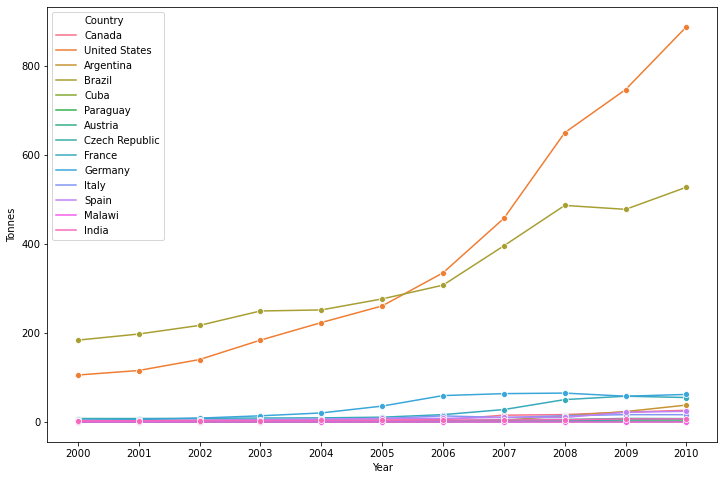

In [37]:

plt.figure(figsize=(12,8))
plt.tight_layout(True)
ax1=sns.lineplot(data=dfprod, x= "Year", y= "Tonnes", hue= "Country",marker="o")


[Text(0, 0, 'Canada'),
 Text(0, 0, 'United States'),
 Text(0, 0, 'Argentina'),
 Text(0, 0, 'Brazil'),
 Text(0, 0, 'Cuba'),
 Text(0, 0, 'Paraguay'),
 Text(0, 0, 'Austria'),
 Text(0, 0, 'Czech Republic'),
 Text(0, 0, 'France'),
 Text(0, 0, 'Germany'),
 Text(0, 0, 'Italy'),
 Text(0, 0, 'Spain'),
 Text(0, 0, 'Malawi'),
 Text(0, 0, 'India')]

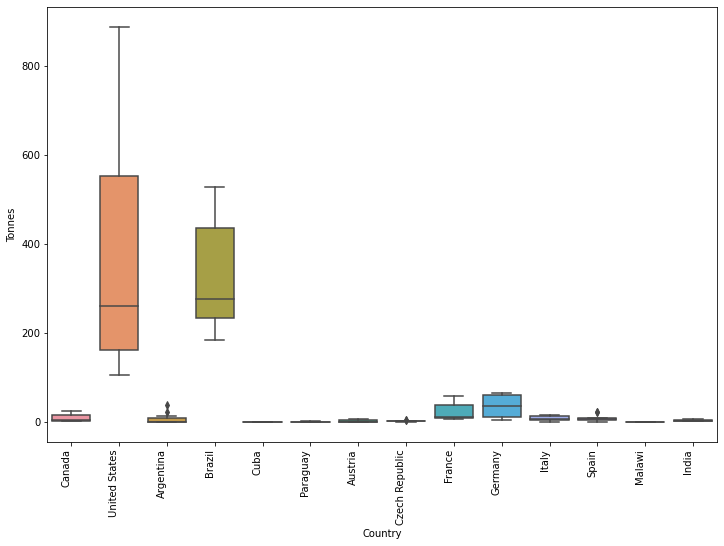

In [38]:
plt.figure(figsize=(12,8))
plt.tight_layout(True)
ax2= sns.boxplot(data=dfprod, x= "Country", y= "Tonnes")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="right")


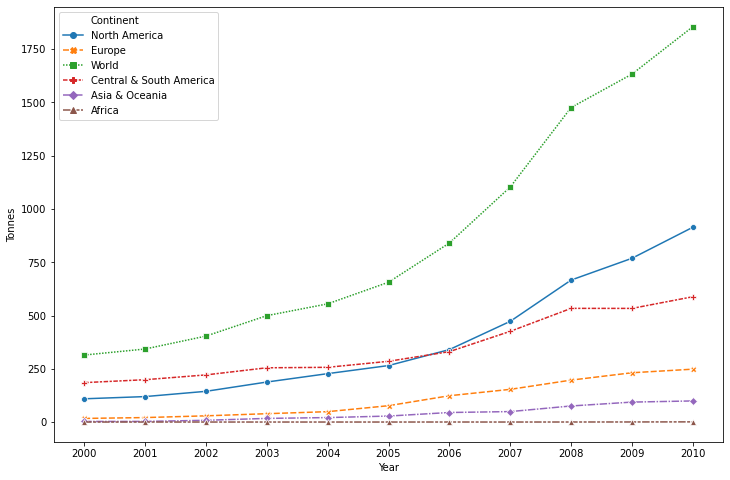

In [39]:
plt.figure(figsize=(12,8))
plt.tight_layout(True)
ax3=sns.lineplot(data=dfprodcontinenti, x= "Year", y= "Tonnes", hue= "Continent",markers=True, style= "Continent")

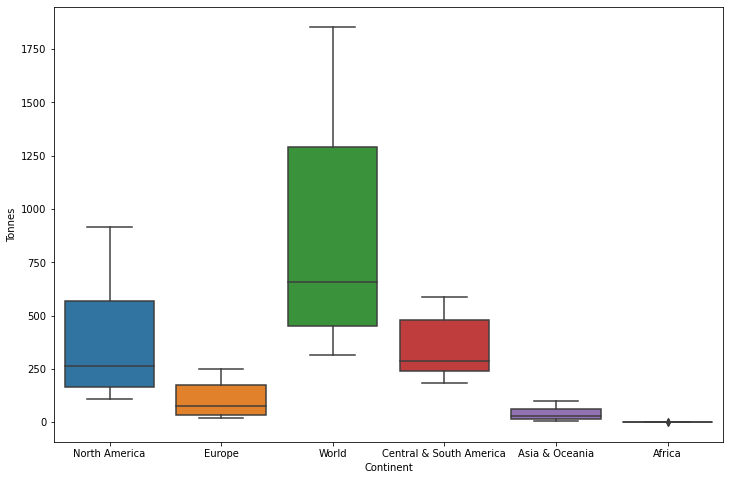

In [40]:
plt.figure(figsize=(12,8))
plt.tight_layout(True)
ax4= sns.boxplot(data=dfprodcontinenti, x= "Continent", y= "Tonnes")

[Text(0, 0, 'Malawi'),
 Text(0, 0, 'Cuba'),
 Text(0, 0, 'Paraguay'),
 Text(0, 0, 'Czech Republic'),
 Text(0, 0, 'Austria'),
 Text(0, 0, 'India'),
 Text(0, 0, 'Argentina'),
 Text(0, 0, 'Italy'),
 Text(0, 0, 'Spain'),
 Text(0, 0, 'Canada'),
 Text(0, 0, 'France'),
 Text(0, 0, 'Germany'),
 Text(0, 0, 'Brazil'),
 Text(0, 0, 'United States')]

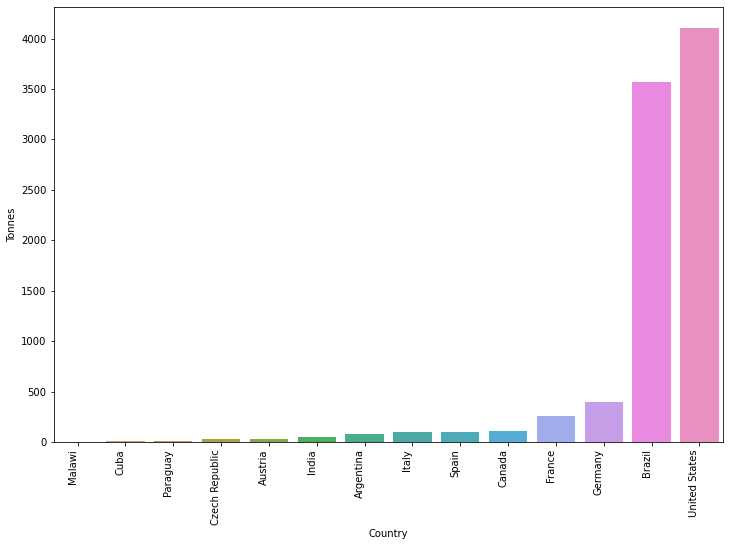

In [41]:
plt.figure(figsize=(12,8))
plt.tight_layout(True)
ax6= sns.barplot(x="Country", y ="Tonnes", data=dfprodtotale)
ax6.set_xticklabels(ax6.get_xticklabels(), rotation=90, ha="right")


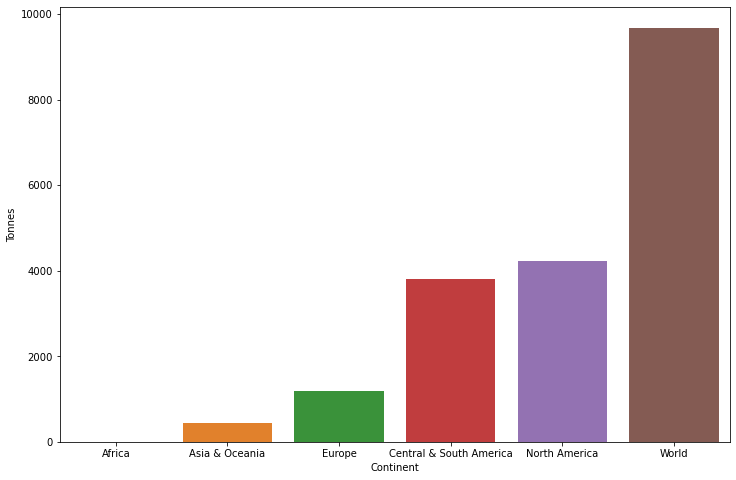

In [42]:
plt.figure(figsize=(12,8))
plt.tight_layout(True)
ax7= sns.barplot(x="Continent", y ="Tonnes", data=dfprodtotalecontinenti)

In [ ]:
# I hope you found this quick analysis informative, please keep in mind this is my first quick analysis project.